Group members:


*   Atharva Padwal - Roll no. 703
*   Dharini Shah - Roll no. 704

*   Kareena Tated - Roll no. 709

**Task 1: Understanding the problem statement**

The objective of this project is to accurately predict the future stock prices using a **Ridge Regression model and Long Short Term Memory networks (LSTM).** 
This exercise is conducted in order to maximize returns for investors and to aid them in planning their buying and selling activities.
Historical stock price data along with volume transactions data is used here.

Artificial intelligence (AI) refers to the simulation of human intelligence in machines that are programmed to think like humans and mimic their actions. The term may also be applied to any machine that exhibits traits associated with a human mind such as learning and problem-solving.

Machine Learning is a subset of Artificial Intelligence that uses statistical learning algorithms to build systems that have the ability to automatically learn and improve from experiences without being explicitly programmed.

Deep learning is a machine learning technique that is inspired by the way a human brain filters information, it is basically learning from examples. It helps a computer model to filter the input data through layers to predict and classify information

**Task 2: Import datasets and libraries**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [ ]:
# Read stock prices data
price=pd.read_csv('/content/stock - stock.csv')
price.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [ ]:
# Read the stocks volume data
volume=pd.read_csv('/content/stock_volume - stock_volume.csv')
volume.head()

Date      AAPL       BA         T       MGM     AMZN      IBM  \
0  2012-01-12  53146800  3934500  26511100  17891100  5385800  6881000   
1  2012-01-13  56505400  4641100  22096800  16621800  4753500  5279200   
2  2012-01-17  60724300  3700100  23500200  15480800  5644500  6003400   
3  2012-01-18  69197800  4189500  22015000  18387600  7473500  4600600   
4  2012-01-19  65434600  5397300  25524000  14022900  7096000  8567200   

      TSLA      GOOG       sp500  
0   729300   3764400  4019890000  
1  5500400   4631800  3692370000  
2  4651600   3832800  4010490000  
3  1260200   5544000  4096160000  
4  1246300  12657800  4465890000

In [ ]:
# Sort the data based on Date
price=price.sort_values(by=['Date'])
price.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [ ]:
# Sort the volume data based on Date
volume=volume.sort_values(by=['Date'])
volume.head()

Date      AAPL       BA         T       MGM     AMZN      IBM  \
0  2012-01-12  53146800  3934500  26511100  17891100  5385800  6881000   
1  2012-01-13  56505400  4641100  22096800  16621800  4753500  5279200   
2  2012-01-17  60724300  3700100  23500200  15480800  5644500  6003400   
3  2012-01-18  69197800  4189500  22015000  18387600  7473500  4600600   
4  2012-01-19  65434600  5397300  25524000  14022900  7096000  8567200   

      TSLA      GOOG       sp500  
0   729300   3764400  4019890000  
1  5500400   4631800  3692370000  
2  4651600   3832800  4010490000  
3  1260200   5544000  4096160000  
4  1246300  12657800  4465890000

In [ ]:
# Check if Null values exist in stock prices data
price.isnull().sum()


Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [ ]:
# Check if Null values exist in stocks volume data
volume.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

No null values are found in either data set

In [ ]:
# Get stock prices dataframe info
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [ ]:
# Get stock volume dataframe info
volume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 185.5+ KB


**Task 3: Performing Exploratory Data Analysis**

In [ ]:
# Function to normalize stock prices based on their initial price
def normalize(df):
  x=df.copy()
  for j in x.columns[1:]:
    x[j]=x[j]/x[j][0]
  return x

In [ ]:
#Normalize stock prices data
normalized_prices=normalize(price)
normalized_prices.head()

Date      AAPL        BA         T       MGM      AMZN       IBM  \
0  2012-01-12  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  2012-01-13  0.996251  0.987949  0.998340  1.018137  1.014153  0.992301   
2  2012-01-17  1.007855  0.996424  1.004316  1.009893  1.032570  0.996954   
3  2012-01-18  1.018320  0.994040  1.006972  1.049464  1.076792  1.002880   
4  2012-01-19  1.015093  1.000662  1.009960  1.055235  1.105269  0.999834   

       TSLA      GOOG     sp500  
0  1.000000  1.000000  1.000000  
1  0.806726  0.992615  0.995052  
2  0.941593  0.998317  0.998587  
3  0.949027  1.005193  1.009680  
4  0.947257  1.015771  1.014666

In [ ]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df,title):
  fig=px.line(title=title)
  
  for i in df.columns[1:]:
    fig.add_scatter(x=df['Date'],y=df[i],name=i)
  fig.show()

In [ ]:
# plot interactive chart for stock prices data
interactive_plot(normalized_prices,title="Normalized stock prices")

The above plot shows the normalized stock prices. Overall, all the stock prices have shown an increasing trend over the years. It is worth noticing that Tesla has shown the highest return over the years followed by Amazon.

In [ ]:
# plot interactive chart for volume data
interactive_plot(normalize(volume),title="Volume")

The above plot shows the normalized volume of the stocks traded over the years.
The volume of s&p 500 is the highest, as expected. This is followed by Apple.

**Task 4: Preparing the data before training the AI/ML Model**

In [ ]:
#Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(price_data, volume_data, stock_name):
  date_df=price_data['Date']
  price_df=price_data[stock_name]
  volume_df=volume_data[stock_name]
  combined_df=pd.concat([date_df,price_df,volume_df],axis=1)
  combined_df.columns=['Date','Price','Volume']
  return combined_df


In [ ]:
#Trying the function on APPLE stock data
individual_data=individual_stock(price,volume,'AAPL')
individual_data.head()


Date      Price    Volume
0  2012-01-12  60.198570  53146800
1  2012-01-13  59.972858  56505400
2  2012-01-17  60.671429  60724300
3  2012-01-18  61.301430  69197800
4  2012-01-19  61.107143  65434600

In [ ]:
#Trying the fucntion on sp500  data
ind_data=individual_stock(price,volume,'sp500')
ind_data

Date        Price      Volume
0     2012-01-12  1295.500000  4019890000
1     2012-01-13  1289.089966  3692370000
2     2012-01-17  1293.670044  4010490000
3     2012-01-18  1308.040039  4096160000
4     2012-01-19  1314.500000  4465890000
...          ...          ...         ...
2154  2020-08-05  3327.770020  4732220000
2155  2020-08-06  3349.159912  4267490000
2156  2020-08-07  3351.280029  4104860000
2157  2020-08-10  3360.469971  4318570000
2158  2020-08-11  3333.689941  5087650000

[2159 rows x 3 columns]

In [ ]:
#Function to return the input/output (target) data for AI/ML Model
# Target stock price today will be tomorrow's price
#This function is performed on all rows except the last one
def target(data):
  data['Target Price']=0.000000
  for j in range(0, len(data)):
    if j!=len(data)-1:
      data['Target Price'][j]=data['Price'][j+1]
  return data

In [ ]:
#Trying the function on Apple data
apple_data=target(individual_data)
#Removing the last row
apple_data = apple_data.iloc[:-1 , :]
apple_data

Date       Price    Volume  Target Price
0     2012-01-12   60.198570  53146800     59.972858
1     2012-01-13   59.972858  56505400     60.671429
2     2012-01-17   60.671429  60724300     61.301430
3     2012-01-18   61.301430  69197800     61.107143
4     2012-01-19   61.107143  65434600     60.042858
...          ...         ...       ...           ...
2153  2020-08-04  438.660004  43267900    440.250000
2154  2020-08-05  440.250000  30498000    455.609985
2155  2020-08-06  455.609985  50607200    444.450012
2156  2020-08-07  444.450012  49453300    450.910004
2157  2020-08-10  450.910004  53100900    437.500000

[2158 rows x 4 columns]

In [ ]:
#Scaling the data
normalized_data=normalize(apple_data)
normalized_data

Date     Price    Volume  Target Price
0     2012-01-12  1.000000  1.000000      1.000000
1     2012-01-13  0.996251  1.063195      1.011648
2     2012-01-17  1.007855  1.142577      1.022153
3     2012-01-18  1.018320  1.302013      1.018913
4     2012-01-19  1.015093  1.231205      1.001167
...          ...       ...       ...           ...
2153  2020-08-04  7.286884  0.814121      7.340821
2154  2020-08-05  7.313297  0.573845      7.596936
2155  2020-08-06  7.568452  0.952215      7.410853
2156  2020-08-07  7.383066  0.930504      7.518568
2157  2020-08-10  7.490377  0.999136      7.294967

[2158 rows x 4 columns]

In [ ]:
#Splitting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(normalized_data,normalized_data['Target Price'],test_size=0.3,shuffle = False)


In [ ]:
x_train.head()

Date     Price    Volume  Target Price
0  2012-01-12  1.000000  1.000000      1.000000
1  2012-01-13  0.996251  1.063195      1.011648
2  2012-01-17  1.007855  1.142577      1.022153
3  2012-01-18  1.018320  1.302013      1.018913
4  2012-01-19  1.015093  1.231205      1.001167

In [ ]:
x_test.head()

Date     Price    Volume  Target Price
1510  2018-01-12  2.941764  0.478262      2.937829
1511  2018-01-16  2.926814  0.556306      2.986351
1512  2018-01-17  2.975154  0.647015      2.989019
1513  2018-01-18  2.977812  0.586929      2.975680
1514  2018-01-19  2.964522  0.610104      2.951335

In [ ]:
#Forming another dataframe for date based on test data
date=x_test['Date']
dataset=pd.DataFrame(date)
dataset=dataset.reset_index()
dataset


index        Date
0     1510  2018-01-12
1     1511  2018-01-16
2     1512  2018-01-17
3     1513  2018-01-18
4     1514  2018-01-19
..     ...         ...
643   2153  2020-08-04
644   2154  2020-08-05
645   2155  2020-08-06
646   2156  2020-08-07
647   2157  2020-08-10

[648 rows x 2 columns]

In [ ]:
#data plotting function
def plot(df, fig_title):
  df.plot(x ="Date", figsize = (15, 7), linewidth = 3, title= fig_title)
  plt.grid()
  plt.show()

TASK 5

TASK 6


**TASK 7: Building and Training a Ridge Linear Regression Model**

In [ ]:
#Removing the date column as it is not needed in the regression and we have already sorted the data by dates. 
x_train=x_train.iloc[:,1:]
x_test=x_test.iloc[:,1:]


In [ ]:
# Create and train the Ridge Linear Regression Model
from sklearn.linear_model import Ridge
ridgeR = Ridge()
ridgeR.fit(x_train, y_train)

Ridge()

In [ ]:
# Testing the model 
y_pred = ridgeR.predict(x_test)

In [ ]:
#Checking its accuracy
#Accuracy in regression is checked by the Mean Squared Error
mean_squared_error = np.mean((y_pred - y_test)**2)
print("Mean squared Error: ", mean_squared_error)

#or we can use the inbuilt metrics function
from sklearn import metrics
print('Mean Square Error:',metrics.mean_squared_error(y_test,y_pred))


Mean squared Error:  0.0009350724081721887
Mean Square Error: 0.0009350724081721891


In [ ]:
#Making Prediction and storing the actual and predicted values in a dataframe
#Converting the values to a list
list_test=y_test.tolist()
list_pred=y_pred.tolist()

In [ ]:
dataset['Actual Values']=list_test
dataset['Predicted Values']=list_pred

In [ ]:
dataset.head()

index        Date  Actual Values  Predicted Values
0   1510  2018-01-12       2.937829          2.941905
1   1511  2018-01-16       2.986351          2.969292
2   1512  2018-01-17       2.989019          2.987117
3   1513  2018-01-18       2.975680          2.979118
4   1514  2018-01-19       2.951335          2.958444

In [ ]:
dataset=dataset.iloc[:,1:]
dataset


Date  Actual Values  Predicted Values
0    2018-01-12       2.937829          2.941905
1    2018-01-16       2.986351          2.969292
2    2018-01-17       2.989019          2.987117
3    2018-01-18       2.975680          2.979118
4    2018-01-19       2.951335          2.958444
..          ...            ...               ...
643  2020-08-04       7.340821          7.325251
644  2020-08-05       7.596936          7.505045
645  2020-08-06       7.410853          7.465575
646  2020-08-07       7.518568          7.475825
647  2020-08-10       7.294967          7.362254

[648 rows x 3 columns]

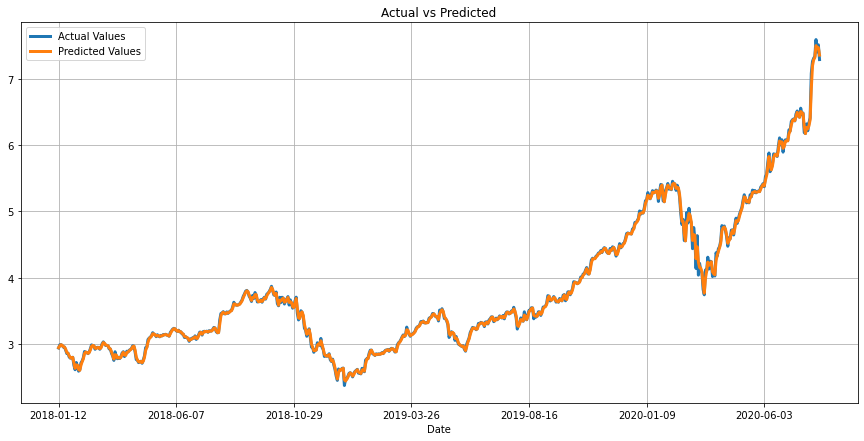

In [ ]:
#Plotting the results
plot(dataset,"Actual vs Predicted")

**TASK 12: Training an LSTM Time series Model**

In [ ]:
# Normalizing the apple data
normalized_data2=normalize(apple_data)
normalized_data2


Date     Price    Volume  Target Price
0     2012-01-12  1.000000  1.000000      1.000000
1     2012-01-13  0.996251  1.063195      1.011648
2     2012-01-17  1.007855  1.142577      1.022153
3     2012-01-18  1.018320  1.302013      1.018913
4     2012-01-19  1.015093  1.231205      1.001167
...          ...       ...       ...           ...
2153  2020-08-04  7.286884  0.814121      7.340821
2154  2020-08-05  7.313297  0.573845      7.596936
2155  2020-08-06  7.568452  0.952215      7.410853
2156  2020-08-07  7.383066  0.930504      7.518568
2157  2020-08-10  7.490377  0.999136      7.294967

[2158 rows x 4 columns]

In [ ]:
# Create the training and testing data
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(normalized_data2,normalized_data2['Target Price'],test_size=0.3,shuffle = False)


In [ ]:
x_train2

Date     Price    Volume  Target Price
0     2012-01-12  1.000000  1.000000      1.000000
1     2012-01-13  0.996251  1.063195      1.011648
2     2012-01-17  1.007855  1.142577      1.022153
3     2012-01-18  1.018320  1.302013      1.018913
4     2012-01-19  1.015093  1.231205      1.001167
...          ...       ...       ...           ...
1505  2018-01-05  2.907046  0.445182      2.907149
1506  2018-01-08  2.896248  0.387000      2.906815
1507  2018-01-09  2.895916  0.406120      2.906148
1508  2018-01-10  2.895251  0.450825      2.922655
1509  2018-01-11  2.911697  0.351248      2.952836

[1510 rows x 4 columns]

In [ ]:
conv_arr= x_train2.values
price_array = np.delete(conv_arr,[0,2,3],axis=1) 
volume_array = np.delete(conv_arr,[0,1,3],axis=1)
target_array = np.delete(conv_arr,[0,1,2],axis=1)
price_array = price_array.ravel()
volume_array = volume_array.ravel()
target_array = target_array.ravel()

In [ ]:
x_train_array=np.array([price_array,volume_array,target_array]).T
x_train_array

array([[1.0, 1.0, 1.0],
       [0.9962505421640415, 1.0631947737210896, 1.0116481192208648],
       [1.0078549872530196, 1.1425767873136294, 1.0221528878947206],
       ...,
       [2.8959159993335395, 0.4061204061204061, 2.9061478610874274],
       [2.8952513822172192, 0.45082488503541135, 2.9226554285607],
       [2.9116970552622763, 0.35124786440575917, 2.9528356977751504]],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
 x_train_array.shape

(1510, 3)

In [ ]:
#creating the model
model=Sequential()


In [ ]:
model.add(LSTM(50,return_sequences=True,input_shape=(1510,3)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1510, 50)          10800     
                                                                 
 lstm_1 (LSTM)               (None, 1510, 50)          20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51,251
Trainable params: 51,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_arr1= x_test2.values
price_array1 = np.delete(conv_arr1,[0,2,3],axis=1) 
volume_array1 = np.delete(conv_arr1,[0,1,3],axis=1)
target_array1 = np.delete(conv_arr1,[0,1,2],axis=1)
price_array1 = price_array1.ravel()
volume_array1 = volume_array1.ravel()
target_array1 = target_array1.ravel()

x_test_array=np.array([price_array1,volume_array1,target_array1]).T
x_test_array.shape
x_test_array

array([[2.9417641648298294, 0.47826209668314934, 2.937829009249484],
       [2.9268137432500474, 0.5563063063063063, 2.986351025658974],
       [2.975153828404894, 0.6470154364891207, 2.989018715766389],
       ...,
       [7.568451958244191, 0.9522153732680049, 7.410852622698088],
       [7.383065943260779, 0.9305038120827595, 7.518567882824594],
       [7.490377329561151, 0.9991363543995123, 7.294966666421]],
      dtype=object)

In [ ]:
conv_arr2= y_train2.values
price_array2 = np.delete(conv_arr2,[0,2,3],axis=1) 
volume_array2 = np.delete(conv_arr2,[0,1,3],axis=1)
target_array2 = np.delete(conv_arr2,[0,1,2],axis=1)
price_array2 = price_array2.ravel()
volume_array2 = volume_array2.ravel()
target_array2 = target_array2.ravel()

y_train_array=np.array([price_array2,volume_array2,target_array2]).T
y_train_array

AxisError: ignored

In [ ]:
conv_arr3= y_test2.values
price_array3 = np.delete(conv_arr,[0,2,3],axis=1) 
volume_array3 = np.delete(conv_arr,[0,1,3],axis=1)
target_array3 = np.delete(conv_arr,[0,1,2],axis=1)
price_array3 = price_array.ravel()
volume_array3 = volume_array.ravel()
target_array3 = target_array.ravel()

y_test_array=np.array([price_array,volume_array,target_array]).T
y_test_array

array([[1.0, 1.0, 1.0],
       [0.9962505421640415, 1.0631947737210896, 1.0116481192208648],
       [1.0078549872530196, 1.1425767873136294, 1.0221528878947206],
       ...,
       [2.8959159993335395, 0.4061204061204061, 2.9061478610874274],
       [2.8952513822172192, 0.45082488503541135, 2.9226554285607],
       [2.9116970552622763, 0.35124786440575917, 2.9528356977751504]],
      dtype=object)

In [ ]:
#model.fit(x_train_array,y_train2,validation_data=(x_test2,y_test2),epochs=100,batch_size=64,verbose=1)

ValueError: ignored